In [295]:
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat

# 1. EDB Score 

In `data/DBData.csv`, you have the full "ease of doing business" dataset from the World Bank. Reformat it into the **Tidy Data** format, so one row is per-year-per-country

Result should look like:

![](EDB_unstack.png)

In [346]:
df = pd.read_csv(r"C:\Users\David\Documents\code\Module 2\m2-5-storytelling\data\DBData.csv")

to_drop = ['Country Code', 'Indicator Code']
df.drop(to_drop, axis=1, inplace=True)


df = pd.melt(df, ['Country Name', 'Indicator Name'], var_name="Year", value_name="Indicator")
df = df.pivot_table(index =['Country Name', 'Year'], columns='Indicator Name').reset_index()

df = df.rename(columns={'Country Name': 'Country'})

df= df.dropna(axis=0, how='all')

# 2 GDP and ease of doing business

Using the additional data in `data/GDPpc.csv`, join the clean dataset in **1** to the GDP data.

**What are the 3 Ease of Doing Business variables most closely linked to GDP?**

Answer by giving their correlation ratio, and give a possible explanation and a data visualization

**hint:** trying to do `df.corr()` or `sns.pairplot()` on the whole dataset will crash most computers. Be smart about the number of columns you're testing at once.

The below three are the most highly correlated variables 
 (Indicator, Paying taxes: Time (hours per year) - Score)                        0.422546
(Indicator, Enforcing contracts (DB04-15 methodology) - Score)                  0.416150
(Indicator, Dealing with construction permits (DB16-19 methodology) - Score)    0.414417
Name: GDP per capita, dtype: float64


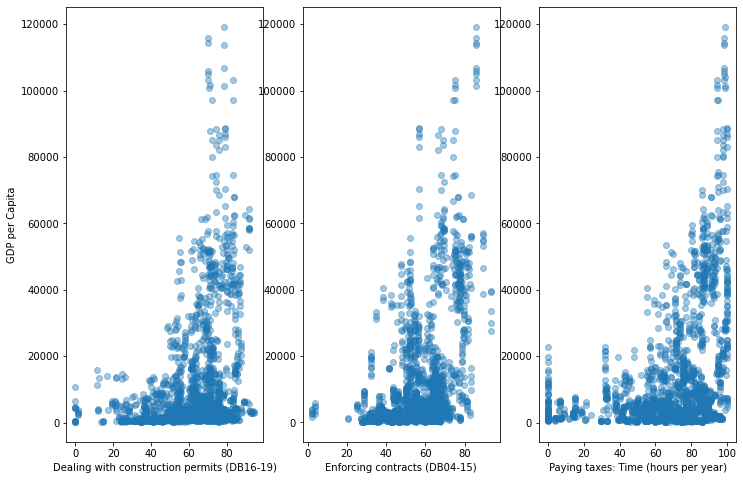

In [417]:
df_ = pd.read_csv(r"C:\Users\David\Documents\code\Module 2\m2-5-storytelling\data\GDPpc.csv")
to_drop = ['Country Code', 'Indicator Code', 'Indicator Name']
df_.drop(to_drop, axis=1, inplace=True)
 
df_ = pd.melt(df_, ['Country Name'], var_name="Year", value_name="GDP per capita")
df_ = df_.rename(columns={'Country Name': 'Country'})

dfy = pd.merge(df,  df_, how='inner', on=['Country', 'Year']) 

temp_df = dfy.dropna(axis=0, how='all')
temp_df = temp_df.nlargest(500, 'GDP per capita')
corr = temp_df.corr()['GDP per capita']
corr = corr.dropna()

print('The below three are the most highly correlated variables \n',corr.sort_values(ascending=False)[1:4])

fig, ax = plt.subplots(1,3, figsize=(12, 8))
tempy = pd.DataFrame()
tempy['Dealing with construction permits (DB16-19 methodology)'] = dfy[dfy.columns[4]]
tempy['Enforcing contracts (DB04-15 methodology)'] = dfy[dfy.columns[20]]
tempy['Paying taxes: Time (hours per year)'] = dfy[dfy.columns[91]]
tempy['Year'] = dfy['Year']
tempy['GDP per Capita'] = dfy['GDP per capita']


ax[0].scatter(tempy['Dealing with construction permits (DB16-19 methodology)'], tempy['GDP per Capita'], alpha=0.4)
ax[0].set(xlabel='Dealing with construction permits (DB16-19)', ylabel='GDP per Capita')
ax[1].scatter(tempy['Enforcing contracts (DB04-15 methodology)'], tempy['GDP per Capita'], alpha=0.4)
ax[1].set(xlabel='Enforcing contracts (DB04-15)')
ax[2].scatter(tempy['Paying taxes: Time (hours per year)'], tempy['GDP per Capita'], alpha=0.4)
ax[2].set(xlabel='Paying taxes: Time (hours per year)')

plt.show()

It's worth mentioning that the correlations here are fairly weak and inconclusive. A quick look at the indicators shows that while these are certainly features that support the growth of businesses within a country, they also seem to be fairly obvious features that any economy with the capacity to improve would do. I would guess that these features work against corruption as well. At a guess, I would say that these features do support strong economies, but it is unclear if the relationship is truly correlated in that these features brought a rise in GDP.

# 3. Chocolate Nobel question

In this repository is the academic paper `chocolate_nobel.pdf`. 

Explain in 3 paragraphs why this paper's conclusions are bad statistics.

*The consumption of chocolate, is a perfect example of the shortcomings of the correlation without context. In short, the paper overlooks the possibility of underlying circumstances which could support the consumption of chocolate and the Nobel Prize winners in proportion due to its strong dependence on correlation.

The logic behind this analysis is that the flavanols found in chocolate appear to be effective in slowing the reduction in cognitive function in rats and should make people smarter. Cognitive ability is not as simple as “smart”. The cognitive functions enhanced by flavanols have no clear relation to those required to win a Nobel Prize, and the author makes no connection other than the fact that they both use some sort of cognitive ability.

In the design and analysis of the results, oversights become important. To begin with, the Nobel Prizes won per capita are a horrible indication of the intelligence of the general population. These are highly skilled minorities who excel which is very different from the average intelligence of the general population. This problem is reinforced by the fact that the overall consumption of chocolate by the population does not in any way mean that the Nobel laureates have consumed chocolate. Finally, regarding the results, the author quickly ruled out the possibility that a third mechanism influences both chocolate consumption and the Nobel Prize, because “since chocolate consumption has been documented to improve cognitive function, it seems very likely that in a dose - dependent manner, the consumption of chocolate provides the abundant fertile soil necessary for the germination of the Nobel Prize winners. It's likely we could recreate a similar study linking the Nobel Prize-winning country to a number of luxury goods.